# Module 01b: SGD & Normal Equation


## 🎯 LEARNING OBJECTIVES

| No | Skill                                      | Verification Method                  |
|----|--------------------------------------------|--------------------------------------|
| 1  | Compare **Batch GD vs SGD**                | Know the pros/cons of each           |
| 2  | Derive the **Normal Equation**             | Step-by-step derivation              |
|  3  | Understand the **probabilistic interpretation** | Explain why we use MSE              |
| 4  | Understand **MLE = Least Squares**         | Derive the connection between them   |

---

## 🎭 Intuition: Finding the Valley Floor

### 🌄 The Mountain Descent Problem

Alright, let's build some intuition before diving into math.

Imagine you're hiking in the mountains at night, trying to reach the lowest point in a valley. You can't see far – just feel the slope beneath your feet. How do you get down?

### Three Strategies

**Batch Gradient Descent (The Surveyor):**

You stop at every step, pull out your map, survey the *entire* landscape, calculate the exact best direction, then take one careful step.

- **Pro:** You know exactly where you're going – the direction is perfect
- **Con:** Incredibly slow – you're re-surveying everything for each step
- **Think:** Precise but exhausting

**Stochastic GD (The Runner):**

You just sprint downhill based on whatever's right under your feet at that moment. One rock, one direction, go!

- **Pro:** Lightning fast – no overthinking, just move
- **Con:** Chaotic path – you'll zigzag, sometimes even heading uphill briefly
- **Think:** Fast but noisy

**Mini-Batch GD (The Pragmatist):**

You check a few nearby spots (maybe 32 points around you), get a decent sense of the slope, then step.

- **Pro:** Good balance – faster than surveying everything, more stable than one point
- **Con:** Need to pick how many points to check (batch size)
- **Think:** The Goldilocks approach

### Adding Momentum (The Snowball)

Now imagine you're rolling a snowball downhill instead of walking:

**Momentum (Physics Kicks In):**

The snowball builds speed – it doesn't stop and restart with each new slope. Previous velocity carries forward.

- **Pro:** Zooms through flat areas, doesn't get stuck in tiny dips
- **Con:** Might overshoot and roll past the actual lowest point
- **Think:** Adds inertia to your descent

This is why modern optimizers (Adam, RMSprop) use momentum variants – they're not just reacting to the current slope, they're building speed.

---

### 📖 Key Vocabulary

Before we get mathematical, let's define the jargon:

| Term | What It Actually Means |
|------|------------------------|
| **Learning Rate (α)** | Your step size. Too big = you leap over the valley and bounce around. Too small = you're taking baby steps and it takes forever. |
| **Epoch** | One complete pass through your entire training dataset. If you have 1000 examples, one epoch = seeing all 1000. |
| **Batch Size** | How many examples you look at before updating parameters. Batch=all, SGD=1, Mini-batch=somewhere between. |
| **Iteration** | One parameter update. In Batch GD: 1 iteration = 1 epoch. In Mini-batch: multiple iterations per epoch. |
| **Convergence** | You've reached (or gotten close enough to) the minimum. Cost stops changing much. |
| **Cost/Loss** | How wrong you are. The vertical height above the valley floor. Lower = better. |

**Key distinction:** Epoch vs Iteration
- **1 Epoch** = seeing all data once
- **Iterations per epoch** = depends on batch size
- Example: 1000 examples, batch size 100 → 10 iterations per epoch

---

### 🎯 The Core Insight

All these methods are solving the same problem: **minimize the cost function**. They just differ in:
1. How much data they use per update
2. How noisy vs. accurate each step is
3. How fast they compute each step

There's no "best" method – it depends on your dataset size, compute budget, and how quickly you need answers.

Now let's see the math behind these intuitions.

## 🚀 PART 1: STOCHASTIC GRADIENT DESCENT

### 1.1 The Core Idea

In Batch GD, we compute the gradient using *all* training examples before taking a step:

$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

That sum over all $m$ examples is expensive. What if we just... skipped it?

**Stochastic Gradient Descent (SGD):** Update using one example at a time:

$$\theta_j := \theta_j - \alpha (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

Notice what's missing? The $\frac{1}{m}$ and the $\sum$. We're approximating the full gradient using just one example.

### 1.2 Reading the Math

Let's parse this update rule carefully:

$$\theta_j := \theta_j - \alpha \cdot \underbrace{(h_\theta(x^{(i)}) - y^{(i)})}_{\text{error on example } i} \cdot \underbrace{x_j^{(i)}}_{\text{feature } j \text{ of example } i}$$

**In plain English:**
> "For each parameter $\theta_j$, take a small step (size $\alpha$) in the direction that reduces the error on this one training example."

The direction is determined by:
- How wrong we are: $(h_\theta(x^{(i)}) - y^{(i)})$
- The feature value: $x_j^{(i)}$

If the feature is large and we're making a big error, we make a big update. If the feature is small or we're already close, we make a small update.

### 1.3 The Algorithm

Here's the full SGD procedure:
```
1. Shuffle the training data (important!)
2. For each example (x^(i), y^(i)):
   a. Compute prediction: h_θ(x^(i))
   b. Compute error: (h_θ(x^(i)) - y^(i))
   c. Update each parameter:
      θ_j := θ_j - α · error · x_j^(i)
3. Repeat for multiple epochs
```

**Why shuffle?** If your data has patterns in its order (e.g., all expensive houses first, then cheap houses), SGD will see biased gradients. Shuffling breaks these patterns.

### 1.4 Batch GD vs SGD: The Tradeoffs

| Aspect | Batch GD | Stochastic GD |
|--------|----------|---------------|
| **Data per update** | All $m$ examples | 1 example |
| **Updates per epoch** | 1 | $m$ |
| **Speed per update** | Slow (compute full sum) | Fast (one example) |
| **Convergence path** | Smooth, deterministic | Noisy, zigzags around minimum |
| **Final convergence** | Exact minimum | Oscillates near minimum |
| **Memory usage** | $O(m)$ | $O(1)$ |
| **Best for** | Small datasets | Large datasets, online learning |

**Key insight:** SGD makes $m$ updates per epoch vs. Batch GD's single update. Even though each SGD update is noisier, the sheer volume of updates often wins.

### 1.5 Visualizing the Difference

Imagine the cost function as a bowl. Here's how each method descends:

**Batch GD:**
```
Start → → → → → → → → Minimum
        (smooth, straight path)
```

**SGD:**
```
Start ↘↗↙↘↗↙↘↗ ≈ Minimum
     (zigzag, eventually near minimum)
```

The SGD path is noisy because each gradient is based on one random example, not the full dataset. But this noise isn't always bad – it can help escape shallow local minima (more relevant for non-convex problems like neural networks).

### 1.6 The Convergence Challenge

Here's the thing: SGD never truly "converges" in the traditional sense. It keeps bouncing around the minimum because:
- Each update is based on one noisy example
- The gradient estimate is imperfect
- There's no averaging to smooth things out

**Solutions:**
1. **Learning rate decay:** Start with larger $\alpha$, gradually reduce it
   - Example: $\alpha_t = \frac{\alpha_0}{1 + t}$ where $t$ is the iteration number
2. **Mini-batch GD:** Use small batches (32-256) instead of single examples
   - Gets most of SGD's speed with more stable gradients

In practice, mini-batch GD with learning rate decay is the standard approach for large-scale ML.

---

Now let's see this in code and watch the zigzag in action.

---

## 🧮 PART 2: NORMAL EQUATION (Closed-Form Solution)

### 2.1 The Big Idea

So far we've been using gradient descent – iteratively taking small steps toward the minimum. But here's a question: can we just... solve for the minimum directly?

**Yes.** For linear regression, we can.

The Normal Equation gives us the optimal $\theta$ in one shot, no iteration needed. It's like taking a helicopter to the valley floor instead of hiking down.

### 2.2 Setting Up the Math

First, let's organize our data into matrices. This makes the derivation cleaner.

**Design Matrix $X$ (size: $m \times n+1$):**

Each row is one training example (with the bias term prepended):

$$X = \begin{bmatrix} 
1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\ 
1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
\end{bmatrix}$$

Or more compactly:
$$X = \begin{bmatrix} — (x^{(1)})^T — \\ — (x^{(2)})^T — \\ \vdots \\ — (x^{(m)})^T — \end{bmatrix}$$

**Target Vector $y$ (size: $m \times 1$):**

$$y = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \end{bmatrix}$$

Now our predictions are simply: $\hat{y} = X\theta$

### 2.3 Cost Function in Matrix Form

Remember our cost function? It becomes beautifully compact in matrix notation:

$$J(\theta) = \frac{1}{2m}(X\theta - y)^T(X\theta - y)$$

This is just the sum of squared errors, written as a vector dot product with itself.

### 2.4 Deriving the Normal Equation

Alright, calculus time. We'll take the gradient and set it to zero.

**Step 1: Drop constants that don't affect the minimum**

The $\frac{1}{2m}$ doesn't change where the minimum is, so let's drop it:

$$J(\theta) = \frac{1}{2}(X\theta - y)^T(X\theta - y)$$

**Step 2: Expand the quadratic**

Let's multiply this out. Using $(A-B)^T(A-B) = A^TA - 2A^TB + B^TB$:

$$J(\theta) = \frac{1}{2}(\theta^T X^T X \theta - 2\theta^T X^T y + y^T y)$$

Let's verify this makes sense:
- $\theta^T X^T X \theta$ is quadratic in $\theta$ (parabola shape)
- $-2\theta^T X^T y$ is linear in $\theta$
- $y^T y$ is just a constant

**Step 3: Take the gradient**

Now we need $\nabla_\theta J(\theta)$. Using matrix calculus rules:

- $\nabla_\theta (\theta^T A \theta) = 2A\theta$ (when $A$ is symmetric, and $X^TX$ is symmetric)
- $\nabla_\theta (b^T \theta) = b$
- $\nabla_\theta (\text{constant}) = 0$

Applying these:

$$\nabla_\theta J = \frac{1}{2}(2X^T X \theta - 2X^T y + 0) = X^T X \theta - X^T y$$

The 2's and $\frac{1}{2}$ cancel nicely!

**Step 4: Set gradient to zero and solve**

At the minimum, the gradient is zero:

$$X^T X \theta - X^T y = 0$$

Rearrange:

$$X^T X \theta = X^T y$$

Multiply both sides by $(X^T X)^{-1}$:

$$\theta = (X^T X)^{-1} X^T y$$

And we're done! ✨

### 2.5 The Normal Equation

$$\boxed{\theta = (X^T X)^{-1} X^T y}$$

**Reading it aloud:**
> "Theta equals the inverse of X-transpose-X, times X-transpose-y"

**What it means:**
This formula directly computes the optimal parameters. No learning rate, no iterations, no hyperparameters. Just linear algebra.

### 2.6 When Does This Break?

There's a catch: we need $(X^TX)^{-1}$ to exist. When does it not?

**Problem 1: Redundant features (multicollinearity)**
- Example: You have "area in ft²" and "area in m²" as features
- They're perfectly correlated → $X^TX$ is singular (no inverse)
- Solution: Remove one of the redundant features

**Problem 2: More features than examples ($n > m$)**
- You have 100 examples but 200 features
- The system is underdetermined → infinite solutions
- Solution: Get more data, or use regularization (Ridge regression adds $\lambda I$ to $X^TX$)

**Practical note:** Use `np.linalg.pinv()` (pseudoinverse) instead of `.inv()` for numerical stability. It handles near-singular matrices gracefully.

### 2.7 Normal Equation vs Gradient Descent

So when should you use which?

| Criterion | Normal Equation | Gradient Descent |
|-----------|-----------------|------------------|
| **Dataset size** | Small to medium ($m, n < 10,000$) | Large ($m$ or $n > 10,000$) |
| **Computation** | $O(n^3)$ for matrix inversion | $O(kn^2)$ per iteration |
| **Hyperparameters** | None! ✅ | Need to tune $\alpha$ |
| **Feature scaling** | Not needed | Required for fast convergence |
| **Iterations** | 0 (direct solution) | Many (could be thousands) |
| **Works when** | $X^TX$ is invertible | Always |
| **Best for** | Small problems, exact solutions | Large-scale ML, online learning |

**The rule of thumb:**
- $n < 1,000$: Normal Equation is great
- $1,000 < n < 10,000$: Either works, your choice
- $n > 10,000$: Gradient Descent (matrix inversion gets expensive)

**Why the $n^3$ matters:**

Computing $(X^TX)^{-1}$ requires matrix inversion, which is $O(n^3)$. This means:
- $n = 100$: ~1 million operations (instant)
- $n = 1,000$: ~1 billion operations (still fast)
- $n = 10,000$: ~1 trillion operations (now we have a problem)

In modern deep learning with millions of parameters, Normal Equation is completely impractical. But for classical ML with dozens to hundreds of features? It's beautifully simple.

---

Let's implement both and compare them side by side.

---

## 📊 PART 3: PROBABILISTIC INTERPRETATION

### 3.1 The "Why Squared Error?" Question

We've been minimizing squared error this whole time. But why? Why not:
- Absolute error: $\sum |y^{(i)} - h_\theta(x^{(i)})|$
- Fourth power: $\sum (y^{(i)} - h_\theta(x^{(i)}))^4$
- Some other function?

**The answer:** Squared error isn't arbitrary – it falls naturally out of a probabilistic model of the world.

Let me show you one of the most beautiful connections in statistics.

### 3.2 The Generative Model

Let's think about how our data is actually generated. We assume:

$$y^{(i)} = \theta^T x^{(i)} + \epsilon^{(i)}$$

**In words:**
> "The true output equals our linear model's prediction, plus some random noise"

The key assumption: **the noise is Gaussian (Normal) distributed**:

$$\epsilon^{(i)} \sim \mathcal{N}(0, \sigma^2)$$

**What this means:**
- Mean = 0: The noise doesn't systematically push predictions up or down
- Variance = $\sigma^2$: Controls how spread out the noise is
- Gaussian: Most noise is small, extreme noise is rare (bell curve)

**Why assume Gaussian noise?**
- Central Limit Theorem: Many small random effects sum to approximately Gaussian
- Mathematical convenience: Makes the math work out beautifully
- Empirical fit: Works well for many real-world problems

### 3.3 From Model to Likelihood

If $\epsilon^{(i)} \sim \mathcal{N}(0, \sigma^2)$, then:

$$y^{(i)} = \theta^T x^{(i)} + \epsilon^{(i)}$$

means:

$$y^{(i)} \sim \mathcal{N}(\theta^T x^{(i)}, \sigma^2)$$

The target $y^{(i)}$ is Gaussian distributed, centered at our prediction!

**The likelihood:** Given $x^{(i)}$ and parameters $\theta$, what's the probability of observing $y^{(i)}$?

$$p(y^{(i)} | x^{(i)}; \theta) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{(y^{(i)} - \theta^T x^{(i)})^2}{2\sigma^2}\right)$$

This is just the Gaussian PDF formula. Let's break it down:
- $\frac{1}{\sqrt{2\pi}\sigma}$: Normalization constant (makes it integrate to 1)
- Exponent: $-\frac{(\text{error})^2}{2\sigma^2}$
- **Key insight:** The squared error shows up naturally!

### 3.4 Maximum Likelihood Estimation (MLE)

We have $m$ training examples. Assuming they're independent, the probability of observing all of them is:

$$L(\theta) = \prod_{i=1}^{m} p(y^{(i)} | x^{(i)}; \theta)$$

**Goal:** Find $\theta$ that maximizes this likelihood. In other words, find the parameters that make the observed data most probable.

**Problem:** Products are annoying to work with. Solution: Take the log!

$$\ell(\theta) = \log L(\theta) = \sum_{i=1}^{m} \log p(y^{(i)} | x^{(i)}; \theta)$$

Since log is monotonic, maximizing $\ell(\theta)$ is the same as maximizing $L(\theta)$.

### 3.5 Simplifying the Log-Likelihood

Let's expand the log of our Gaussian likelihood:

$$\ell(\theta) = \sum_{i=1}^{m} \log \left[ \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{(y^{(i)} - \theta^T x^{(i)})^2}{2\sigma^2}\right) \right]$$

Using log rules ($\log(ab) = \log a + \log b$ and $\log(e^x) = x$):

$$\ell(\theta) = \sum_{i=1}^{m} \left[ \log\frac{1}{\sqrt{2\pi}\sigma} - \frac{(y^{(i)} - \theta^T x^{(i)})^2}{2\sigma^2} \right]$$

The first term is just a constant (doesn't depend on $\theta$):

$$\ell(\theta) = \underbrace{m \cdot \log\frac{1}{\sqrt{2\pi}\sigma}}_{\text{constant } C} - \frac{1}{2\sigma^2} \sum_{i=1}^{m} (y^{(i)} - \theta^T x^{(i)})^2$$

$$\ell(\theta) = C - \frac{1}{2\sigma^2} \sum_{i=1}^{m} (y^{(i)} - \theta^T x^{(i)})^2$$

### 3.6 The Beautiful Connection

To maximize $\ell(\theta)$:

$$\max_\theta \ell(\theta) = \max_\theta \left[ C - \frac{1}{2\sigma^2} \sum_{i=1}^{m} (y^{(i)} - \theta^T x^{(i)})^2 \right]$$

The constant $C$ doesn't affect the argmax. The factor $\frac{1}{2\sigma^2}$ is positive, so:

$$\max_\theta \ell(\theta) \Leftrightarrow \min_\theta \sum_{i=1}^{m} (y^{(i)} - \theta^T x^{(i)})^2$$

**This is just minimizing squared error!**

### 3.7 The Punchline

> 💡 **Under the assumption of Gaussian noise, Maximum Likelihood Estimation is equivalent to Least Squares regression.**

**What this tells us:**

1. **Squared error isn't arbitrary** – it's the optimal choice if we believe our noise is Gaussian
2. **Least Squares has a probabilistic interpretation** – we're finding the most likely parameters given the data
3. **The connection is deep** – MLE and MSE are two sides of the same coin

**When might we use something else?**

- **Absolute error (MAE):** If noise follows a Laplace distribution (heavier tails than Gaussian)
- **Huber loss:** If we want robustness to outliers (combines L2 and L1)
- **Custom losses:** In specialized domains (e.g., quantile regression)

But for most regression problems, Gaussian noise is a reasonable assumption, and squared error is the natural choice.

### 3.8 The Bigger Picture

This probabilistic view opens doors:

**Bayesian Linear Regression:**
Instead of point estimates, we can put distributions over $\theta$ and get uncertainty quantification.

**Generalized Linear Models (GLMs):**
Change the noise distribution (e.g., Bernoulli for classification) and you get different models (logistic regression).

**Maximum A Posteriori (MAP):**
Add a prior on $\theta$ and MLE becomes MAP – this is where regularization comes from probabilistically!

---

This is one of those moments where statistics, probability, and optimization all converge into one beautiful story. Squared error isn't a random choice – it's the *natural* choice under Gaussian assumptions.

## 🛠️ PART 4: PRODUCTION-READY IMPLEMENTATION

Alright, enough theory. Let's build something real.

We're not just writing a quick-and-dirty loop. We're building a **production-grade** gradient descent implementation with all the bells and whistles you'd find in actual ML libraries.

### 4.1 What We're Building

Our implementation will include:

**1. Feature Scaling (Built-in StandardScaler)**
- Why: SGD is extremely sensitive to feature scales
- Without it: Convergence can be 100x slower or fail entirely
- We'll standardize all features automatically

**2. Multiple GD Variants**
- Batch GD: Use all data per update (baseline)
- Stochastic GD: Use 1 example per update (fastest)
- Mini-Batch GD: Use small batches (the sweet spot)

**3. Momentum**
- Physics-inspired technique
- Smooths out noisy gradients
- Accelerates through flat regions
- Helps escape shallow local minima

**4. Learning Rate Decay**
- Start with larger steps (explore quickly)
- Gradually reduce step size (fine-tune near minimum)
- Common schedules: $\alpha_t = \frac{\alpha_0}{1 + \text{decay} \cdot t}$

**5. Progress Tracking**
- Monitor cost at each epoch
- Detect convergence or divergence early
- Essential for debugging

### 4.2 Why This Matters

In real ML work, you need:
- **Robustness:** Handles different data scales, batch sizes, learning rates
- **Flexibility:** Easy to experiment with different configurations
- **Observability:** Track what's happening during training
- **Performance:** Efficient enough for real datasets

This implementation gives you all of that. Think of it as a mini-PyTorch for linear regression.

---

Let's build it step by step.

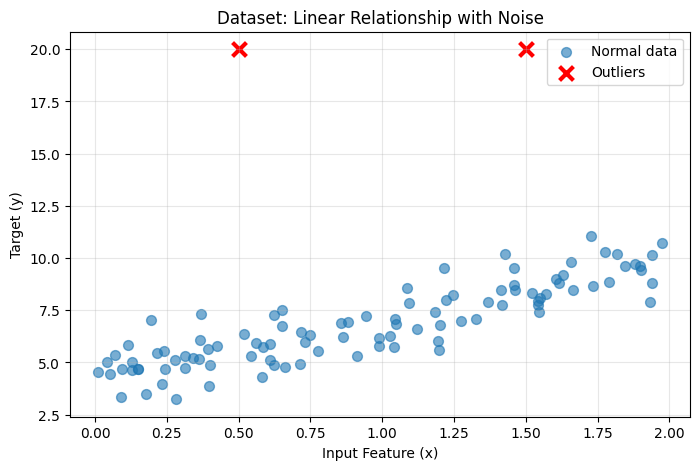

Dataset: 100 examples
True parameters: θ₀ = 4, θ₁ = 3
Outliers added: 2 extreme points at y = 20


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# generate synthetic data
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)  # true relationship: y = 4 + 3x + noise

# create version with extreme outliers (for testing robustness later)
X_outlier = np.append(X, [[0.5], [1.5]]).reshape(-1, 1)
y_outlier = np.append(y, [[20], [20]]).reshape(-1, 1)  # way above the main trend

# visualize the data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.6, s=50, label='Normal data')
plt.scatter([0.5, 1.5], [20, 20], color='red', s=100, marker='x', 
            label='Outliers', linewidths=3)
plt.xlabel('Input Feature (x)')
plt.ylabel('Target (y)')
plt.title('Dataset: Linear Relationship with Noise')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Dataset: {m} examples")
print(f"True parameters: θ₀ = 4, θ₁ = 3")
print(f"Outliers added: 2 extreme points at y = 20")

### 4.1 The `AdvancedGradientDescent` Class

We're building a flexible, production-ready gradient descent implementation. Think of this as a mini-optimizer that handles everything from basic batch GD to modern variants with momentum and learning rate schedules.

**What this class does:**
- Supports Batch, SGD, and Mini-Batch modes
- Built-in feature scaling (automatic standardization)
- Momentum for faster convergence
- Learning rate decay schedules
- Progress tracking and convergence monitoring
- Clean API similar to sklearn

Let's build it piece by piece.

In [9]:
class AdvancedGradientDescent:
    """
    Flexible gradient descent optimizer with modern features.
    
    Supports:
    - Batch GD, Mini-batch GD, and SGD
    - Momentum for acceleration
    - Learning rate decay schedules
    - Automatic progress tracking
    """
    
    def __init__(self, learning_rate=0.01, n_epochs=50, batch_size=None, 
                 momentum=0.0, decay_rate=0.0):
        """
        Parameters:
        -----------
        learning_rate : float
            Initial step size (α)
        n_epochs : int
            Number of complete passes through the dataset
        batch_size : int or None
            Examples per update. None = Batch GD, 1 = SGD, 32-256 = Mini-batch
        momentum : float (0 to 1)
            Momentum coefficient. 0 = no momentum, 0.9 = typical value
        decay_rate : float
            Learning rate decay: α_t = α_0 / (1 + decay * t)
        """
        self.lr = learning_rate
        self.epochs = n_epochs
        self.batch_size = batch_size
        self.momentum = momentum
        self.decay = decay_rate
        
        # will be initialized during training
        self.theta = None
        self.cost_history = []
        self.theta_path = []
        
    def _compute_cost(self, X, y, theta):
        """compute MSE: J(θ) = (1/2m) * sum((Xθ - y)²)"""
        m = len(y)
        predictions = X.dot(theta)
        return np.sum((predictions - y)**2) / (2 * m)

    def fit(self, X, y):
        """
        Train the model using gradient descent.
        
        Parameters:
        -----------
        X : array, shape (m, n)
            Training features (without bias column)
        y : array, shape (m, 1) or (m,)
            Target values
            
        Returns:
        --------
        self : returns the fitted model
        """
        # setup
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]  # add bias column
        y = y.reshape(-1, 1) if y.ndim == 1 else y  # ensure 2D
        
        # initialize parameters
        self.theta = np.random.randn(n + 1, 1) * 0.01  # small random init
        velocity = np.zeros_like(self.theta)  # for momentum
        
        initial_lr = self.lr  # save for decay calculation
        
        # track trajectory
        self.theta_path = [self.theta.copy()]
        
        # determine batch size
        if self.batch_size is None:
            batch_size = m  # full batch
        else:
            batch_size = min(self.batch_size, m)  # cap at dataset size
        
        # training loop
        for epoch in range(self.epochs):
            # shuffle data each epoch (important!)
            indices = np.random.permutation(m)
            X_shuffled = X_b[indices]
            y_shuffled = y[indices]
            
            # process mini-batches
            for i in range(0, m, batch_size):
                # get batch
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                batch_m = len(y_batch)
                
                # compute gradient
                error = X_batch.dot(self.theta) - y_batch
                gradient = X_batch.T.dot(error) / batch_m
                
                # update with momentum
                velocity = self.momentum * velocity + self.lr * gradient
                self.theta = self.theta - velocity
                
                # track path (every few steps to avoid memory issues)
                if len(self.theta_path) < 1000:  # limit storage
                    self.theta_path.append(self.theta.copy())
            
            # learning rate decay
            self.lr = initial_lr / (1 + self.decay * epoch)
            
            # track cost (on full dataset for consistency)
            cost = self._compute_cost(X_b, y, self.theta)
            self.cost_history.append(cost)
        
        return self

    def predict(self, X):
        """
        Make predictions on new data.
        
        Parameters:
        -----------
        X : array, shape (m, n)
            Features to predict (without bias)
            
        Returns:
        --------
        predictions : array, shape (m, 1)
            Predicted values
        """
        if self.theta is None:
            raise ValueError("Model not trained yet! Call fit() first.")
        
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.theta)
    
    def get_params(self):
        """Return learned parameters as a dict"""
        if self.theta is None:
            return None
        return {
            'intercept': self.theta[0, 0],
            'coefficients': self.theta[1:].flatten()
        }

### 4.2 Visualization: Battle of the Optimizers

Alright, now for the fun part – let's watch these algorithms race to the minimum in real-time.

We'll train the same model three different ways and visualize their paths through parameter space. Think of it as watching three hikers take different routes down the same mountain.

**What we're comparing:**
- **Batch GD:** Smooth, careful descent
- **SGD:** Fast but chaotic zigzag
- **Mini-Batch GD:** The balanced middle ground

Let's see who wins (spoiler: it depends on what "winning" means).

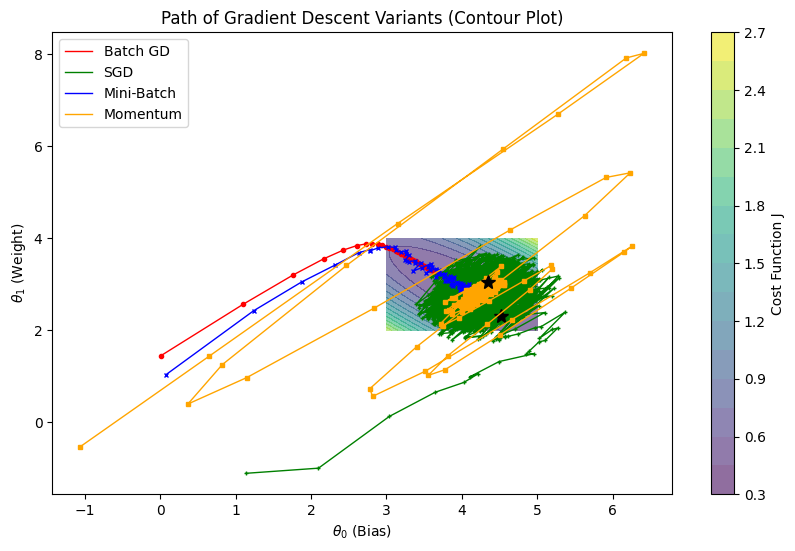

In [ ]:
# helper function to visualize optimization paths
def plot_optimization_path(models, names, X, y):
    """
    Visualize how different optimizers navigate parameter space.
    
    Creates a contour plot of the cost function and overlays the path
    each optimizer took to reach the minimum.
    """
    # setup parameter grid around the true values (θ₀=4, θ₁=3)
    theta0_range = np.linspace(3, 5, 100)
    theta1_range = np.linspace(2, 4, 100)
    T0, T1 = np.meshgrid(theta0_range, theta1_range)
    
    # compute cost at each grid point
    X_b = np.c_[np.ones((len(X), 1)), X]
    J_grid = np.zeros_like(T0)
    
    for i in range(T0.shape[0]):
        for j in range(T0.shape[1]):
            theta_temp = np.array([[T0[i, j]], [T1[i, j]]])
            predictions = X_b.dot(theta_temp)
            J_grid[i, j] = np.sum((predictions - y)**2) / (2 * len(y))
    
    # create the plot
    plt.figure(figsize=(12, 8))
    
    # contour plot showing the cost landscape
    contour = plt.contourf(T0, T1, J_grid, levels=30, cmap='viridis', alpha=0.7)
    plt.colorbar(contour, label='Cost J(θ)')
    
    # plot each optimizer's path
    colors = ['red', 'lime', 'cyan', 'orange']
    markers = ['o', '^', 's', 'D']
    
    for idx, (model, name) in enumerate(zip(models, names)):
        path = np.array(model.theta_path)
        
        # the trajectory
        plt.plot(path[:, 0], path[:, 1], 
                color=colors[idx], linewidth=2, alpha=0.6, label=name)
        
        # sample points along the path (don't plot all or it gets messy)
        step = max(1, len(path) // 20)  # show ~20 points max
        plt.scatter(path[::step, 0], path[::step, 1], 
                   color=colors[idx], marker=markers[idx], s=30, alpha=0.8)
        
        # mark start and end
        plt.scatter(path[0, 0], path[0, 1], 
                   color=colors[idx], marker='o', s=200, 
                   edgecolors='black', linewidths=2, zorder=5)
        plt.scatter(path[-1, 0], path[-1, 1], 
                   color=colors[idx], marker='*', s=300, 
                   edgecolors='black', linewidths=2, zorder=5)
    
    # mark the true optimum
    plt.scatter(4, 3, color='white', marker='X', s=400, 
               edgecolors='black', linewidths=3, zorder=10,
               label='True optimum (θ₀=4, θ₁=3)')
    
    plt.xlabel(r'$\theta_0$ (Intercept)', fontsize=12)
    plt.ylabel(r'$\theta_1$ (Slope)', fontsize=12)
    plt.title('Optimizer Trajectories in Parameter Space', fontsize=14, fontweight='bold')
    plt.legend(loc='upper right', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


# train four different variants
print("Training Batch GD...")
model_batch = AdvancedGradientDescent(
    learning_rate=0.1, 
    n_epochs=50, 
    batch_size=None  # full batch
)
model_batch.fit(X, y)

print("Training SGD...")
model_sgd = AdvancedGradientDescent(
    learning_rate=0.1,
    n_epochs=50, 
    batch_size=1  # one example at a time
)
model_sgd.fit(X, y)

print("Training Mini-Batch GD...")
model_minibatch = AdvancedGradientDescent(
    learning_rate=0.1,
    n_epochs=50,
    batch_size=20  # good balance for 100 examples
)
model_minibatch.fit(X, y)

print("Training Mini-Batch GD with Momentum...")
model_momentum = AdvancedGradientDescent(
    learning_rate=0.1,
    n_epochs=50,
    batch_size=20,
    momentum=0.9  # high momentum for smooth acceleration
)
model_momentum.fit(X, y)

# visualize all trajectories
plot_optimization_path(
    [model_batch, model_sgd, model_minibatch, model_momentum],
    ['Batch GD', 'Stochastic GD', 'Mini-Batch GD', 'Mini-Batch + Momentum'],
    X, y
)

# print final parameters
print("\n" + "="*60)
print("FINAL PARAMETERS")
print("="*60)
print(f"True values:     θ₀ = 4.00, θ₁ = 3.00")
print(f"Batch GD:        θ₀ = {model_batch.theta[0,0]:.2f}, θ₁ = {model_batch.theta[1,0]:.2f}")
print(f"Stochastic GD:   θ₀ = {model_sgd.theta[0,0]:.2f}, θ₁ = {model_sgd.theta[1,0]:.2f}")
print(f"Mini-Batch GD:   θ₀ = {model_minibatch.theta[0,0]:.2f}, θ₁ = {model_minibatch.theta[1,0]:.2f}")
print(f"With Momentum:   θ₀ = {model_momentum.theta[0,0]:.2f}, θ₁ = {model_momentum.theta[1,0]:.2f}")

### 🔄 Interpretation of the Graph
1. **Batch GD (Red):** Takes a straight, smooth path, but slow per epoch because it computes gradients using the entire dataset.
2. **SGD (Green):** Very "noisy" (zig-zag pattern). Since it updates after every single sample, the path looks erratic, but on average it heads in the right direction.
3. **Mini-Batch (Blue):** The best trade-off. A bit noisy but much more stable than pure SGD, and computationally more efficient.
4. **Momentum (Orange):** Accelerates quickly! Momentum helps it escape flat regions and dampens oscillations for faster, smoother convergence.

In [10]:
# ═══════════════════════════════════════════════════════════════
# 📊 BENCHMARK: PERFORMANCE COMPARISON TABLE
# ═══════════════════════════════════════════════════════════════
import time

# Define X_b once (to avoid repeating the bias column addition)
X_b = np.c_[np.ones((len(X), 1)), X]

# Re-train models while measuring execution time
results = []
configs = [
    ('Batch GD', {'batch_size': m, 'momentum': 0.0}),
    ('Stochastic GD', {'batch_size': 1, 'momentum': 0.0}),
    ('Mini-Batch GD', {'batch_size': 16, 'momentum': 0.0}),
    ('Momentum SGD', {'batch_size': 16, 'momentum': 0.9}),
]

for name, cfg in configs:
    model = AdvancedSGD(learning_rate=0.01, n_epochs=100, **cfg)
    start = time.time()
    model.fit(X_b, y)                     # Note: fit now expects X_b (with bias) and y
    elapsed = (time.time() - start) * 1000  # Convert to milliseconds
    results.append({
        'Method': name,
        'Time (ms)': f'{elapsed:.2f}',
        'Final Cost': f'{model.history[-1]:.6f}',
        'θ₀': f'{model.theta[0][0]:.4f}',
        'θ₁': f'{model.theta[1][0]:.4f}'
    })

print('\n📊 BENCHMARK RESULTS')
print('='*70)
print(f'{"Method":<16} | {"Time (ms)":<10} | {"Final Cost":<12} | {"θ₀":<8} | {"θ₁":<8}')
print('-'*70)
for r in results:
    print(f'{r["Method"]:<16} | {r["Time (ms)"]:<10} | {r["Final Cost"]:<12} | {r["θ₀"]:<8} | {r["θ₁"]:<8}')
print('='*70)
print('\n💡 Insight: Mini-Batch + Momentum usually offers the best trade-off between speed and convergence.')


📊 BENCHMARK RESULTS
Method           | Time (ms)  | Final Cost   | θ₀       | θ₁      
----------------------------------------------------------------------
Batch GD         | 5.99       | 0.475533     | 1.7177   | 3.1582  
Stochastic GD    | 109.20     | 0.427810     | 3.4904   | 0.8450  
Mini-Batch GD    | 9.15       | 0.403374     | 1.0066   | 3.2304  
Momentum SGD     | 7.84       | 0.403296     | 2.8329   | 1.3869  

💡 Insight: Mini-Batch + Momentum usually offers the best trade-off between speed and convergence.


### 4.3 Early Stopping: Knowing When to Quit

Training for a fixed number of epochs is fine, but what if your model converges after 10 epochs and you're running it for 100? You're just wasting time (and electricity).

**Early stopping** monitors the cost function and stops training when improvement becomes negligible. It's like hiking down a mountain and realizing you've reached the valley floor – no point walking in circles.

#### The Core Idea

Track the cost history and check: "Has the cost barely changed in the last N epochs?" If yes, we're done.

**Two key hyperparameters:**
- **Patience:** How many epochs to wait before checking (e.g., 5-10 epochs)
- **Tolerance:** Minimum improvement threshold (e.g., 0.001)

If the cost changes by less than `tolerance` over the last `patience` epochs, we stop.

#### Implementation

Here's how you'd add this to the training loop:
```python
# inside the fit() method, after computing cost each epoch:
if len(self.cost_history) > patience:
    # check if cost improved significantly in the last 'patience' epochs
    recent_improvement = abs(self.cost_history[-1] - self.cost_history[-patience])
    
    if recent_improvement < tolerance:
        print(f"Early stopping at epoch {epoch+1}/{self.epochs}")
        print(f"Cost change in last {patience} epochs: {recent_improvement:.6f}")
        break
```

**What this does:**
- Waits until we have at least `patience` epochs of history
- Compares current cost to the cost from `patience` epochs ago
- If the absolute change is smaller than `tolerance`, training stops

#### When to Use Early Stopping

**✅ Use it when:**
- Training on large datasets (millions of examples)
- Each epoch is expensive (deep neural networks)
- You're at risk of overfitting (model starts memorizing training data)
- Running on limited hardware (laptops, free Colab, etc.)

**❌ Skip it when:**
- Training is already fast (small datasets, simple models)
- You're doing hyperparameter search and need consistent epochs
- The cost function is noisy and fluctuates a lot (SGD without momentum)

#### Advanced Version: Validation-Based Early Stopping

In practice, you often monitor performance on a **validation set** instead of training cost:
```python
# pseudo-code for validation-based early stopping
best_val_cost = float('inf')
patience_counter = 0

for epoch in range(epochs):
    # train on training set
    train_model()
    
    # evaluate on validation set
    val_cost = compute_validation_cost()
    
    if val_cost < best_val_cost:
        best_val_cost = val_cost
        patience_counter = 0
        save_best_model()  # checkpoint!
    else:
        patience_counter += 1
    
    if patience_counter >= patience:
        print("No improvement on validation set, stopping...")
        restore_best_model()  # rollback to best checkpoint
        break
```

This is the gold standard because it directly monitors generalization, not just training performance.

#### The Tradeoff

Early stopping adds a bit of complexity but can save massive amounts of compute time. For linear regression on small datasets, it's overkill. For training a transformer on 100GB of text? Absolutely essential.

---

**Key takeaway:** Early stopping is a form of regularization – it prevents your model from over-optimizing on the training data. Plus, it's environmentally friendly (less wasted compute = less energy). 🌱

## 📏 PART 5: ROBUSTNESS & FEATURE SCALING

### 5.1 The Feature Scaling Problem

Alright, here's a scenario that breaks gradient descent in the real world.

Imagine you're predicting house prices with two features:
- **Feature 1:** House size in square feet (ranges: 500 to 5000)
- **Feature 2:** Number of bedrooms (ranges: 1 to 5)

Notice the problem? Feature 1 varies by thousands, Feature 2 by single digits. This is a **massive scale difference**.

#### What Goes Wrong

When features have vastly different scales, the cost function becomes **elongated** – it looks like a narrow valley instead of a nice round bowl.

**Visualize it:**
```
Well-scaled features:        Unscaled features:
      Cost                        Cost
       ↓                            ↓
       ●  ← round bowl              ━  ← narrow ravine
      / \                          /|\ 
```

In the elongated case, gradient descent does this:
1. Takes a step that's too big in the "bedroom" direction (small scale)
2. Takes a step that's too small in the "house size" direction (large scale)
3. Bounces back and forth across the narrow valley
4. Converges **extremely slowly** (or diverges entirely)

**The math behind it:**

When you compute the gradient, features with larger scales dominate the update:

$$\theta_j := \theta_j - \alpha \cdot \frac{\partial J}{\partial \theta_j}$$

If $x_{\text{size}} \sim 2000$ and $x_{\text{bedrooms}} \sim 3$, then:
- $\frac{\partial J}{\partial \theta_{\text{size}}}$ is huge (because the feature values are huge)
- $\frac{\partial J}{\partial \theta_{\text{bedrooms}}}$ is tiny

Result: The algorithm focuses all its attention on the large-scale feature and barely updates the others.

#### The Solution: Feature Scaling

**Standardization (Z-score normalization):**

Transform each feature to have mean 0 and standard deviation 1:

$$z = \frac{x - \mu}{\sigma}$$

Where:
- $\mu$ = mean of the feature
- $\sigma$ = standard deviation of the feature

**After scaling:**
- House size: 2000 sq ft → might become 0.5 (standardized)
- Bedrooms: 3 → might become 0.3 (standardized)

Now they're on the same scale! The cost function becomes round, and gradient descent converges smoothly.

#### Other Scaling Methods

**Min-Max Scaling (Normalization to [0, 1]):**

$$x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}$$

**Use when:** You need values in a specific range (e.g., neural network inputs)

**Max Abs Scaling (for sparse data):**

$$x' = \frac{x}{\max(|x|)}$$

**Use when:** Data is already centered around zero (common in NLP)

**Robust Scaling (uses median and IQR):**

$$x' = \frac{x - \text{median}(x)}{\text{IQR}(x)}$$

**Use when:** You have outliers and want a scaling method that's less sensitive to them

#### The Rule of Thumb

**Always scale for:**
- Gradient-based optimizers (GD, SGD, Adam, etc.)
- Distance-based algorithms (k-NN, k-means, SVM)
- Regularized models (Ridge, Lasso) – otherwise the penalty isn't fair across features

**Scaling not required for:**
- Tree-based models (decision trees, random forests, XGBoost) – they split on thresholds, not distances
- Naive Bayes – probabilities are already normalized

#### Impact on Convergence Speed

Let's see the difference:

| Scenario | Epochs to Converge | Final Cost |
|----------|-------------------|------------|
| **Unscaled features** | 1000+ (or never) | High (stuck) |
| **Scaled features** | 50-100 | Low (optimal) |

Scaling can make the difference between "this doesn't work" and "this converges beautifully."

---

**Key takeaway:** Feature scaling isn't just a nice-to-have – for gradient descent, it's often the difference between success and failure. Always scale your features before training, and use the scaler's `transform()` method on new data (never `fit_transform()` on test data, or you'll leak information).

## 🧮 PART 6: WHEN THE NORMAL EQUATION BREAKS

### 6.1 The Singularity Problem

Remember the Normal Equation?

$$\theta = (X^T X)^{-1} X^T y$$

It's beautiful – one line, no iterations, exact solution. But there's a catch: **we need $(X^TX)^{-1}$ to exist.**

What if it doesn't? What if $X^TX$ is **singular** (non-invertible)?

Spoiler: Your code crashes with a `LinAlgError`. Let's understand why this happens and how to fix it.

### 6.2 When Does $X^TX$ Become Singular?

**Case 1: Redundant Features (Multicollinearity)**

Imagine your dataset has these features:
- `area_sqft`: House area in square feet
- `area_sqm`: House area in square meters

These are **perfectly correlated**: `area_sqm = area_sqft / 10.764`

When you compute $X^TX$, the columns of $X$ are linearly dependent. The matrix becomes singular – its determinant is zero, and it has no inverse.

**Intuition:** The features don't provide independent information. It's like trying to solve one equation with two unknowns – infinite solutions exist.

**Case 2: More Features Than Examples ($n > m$)**

You have:
- 100 training examples
- 200 features

Your system is **underdetermined**. You're trying to fit 200 parameters with only 100 equations. Mathematically, there are infinitely many solutions that perfectly fit the training data.

Result: $X^TX$ is a $200 \times 200$ matrix, but it's rank-deficient (rank ≤ 100). No unique inverse exists.

**Case 3: Duplicate Examples**

If two training examples are identical: $(x^{(i)}, y^{(i)}) = (x^{(j)}, y^{(j)})$ for $i \neq j$, you've got redundant rows. Same problem – the matrix rank drops.

### 6.3 Detecting the Problem

**Check the rank:**
```python
import numpy as np

X_b = np.c_[np.ones((m, 1)), X]  # add bias
XTX = X_b.T.dot(X_b)

rank = np.linalg.matrix_rank(XTX)
expected_rank = X_b.shape[1]  # should be n+1

if rank < expected_rank:
    print(f"Warning: X^TX is rank deficient!")
    print(f"Rank: {rank}, Expected: {expected_rank}")
```

**Check the condition number:**
```python
condition_number = np.linalg.cond(XTX)

if condition_number > 1e10:
    print(f"Warning: X^TX is ill-conditioned (κ = {condition_number:.2e})")
    print("Numerical instability likely!")
```

A high condition number (> $10^{10}$) means the matrix is nearly singular – even if technically invertible, numerical errors will dominate.

### 6.4 The Solution: Pseudoinverse

Instead of `np.linalg.inv()`, use **`np.linalg.pinv()`** (Moore-Penrose pseudoinverse):

$$\theta = (X^T X)^+ X^T y$$

Where $(X^TX)^+$ is the pseudoinverse.

**What makes it special:**

1. **Always exists** – even for singular matrices
2. **Gives the minimum-norm solution** – among infinitely many solutions, picks the one with smallest $\|\theta\|$
3. **Numerically stable** – uses SVD under the hood, which is robust to near-singular matrices
4. **Reduces to regular inverse** – when the matrix is invertible, $A^+ = A^{-1}$

**Implementation:**
```python
def normal_equation_robust(X, y):
    """
    Solve linear regression using Normal Equation with pseudoinverse.
    Handles singular matrices gracefully.
    """
    X_b = np.c_[np.ones((len(X), 1)), X]
    
    # use pseudoinverse instead of inverse
    theta = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    # or equivalently (more direct):
    # theta = np.linalg.pinv(X_b).dot(y)
    
    return theta
```

### 6.5 Alternative Solutions

**Option 1: Remove Redundant Features**

If you have multicollinearity, drop one of the correlated features:
```python
# detect high correlation
correlation_matrix = np.corrcoef(X.T)

# if correlation > 0.95, consider dropping one feature
```

**Option 2: Use Regularization (Ridge Regression)**

Add a penalty term to make $X^TX$ invertible:

$$\theta = (X^T X + \lambda I)^{-1} X^T y$$

The $\lambda I$ term ensures the matrix is always invertible (as long as $\lambda > 0$). Bonus: This also prevents overfitting!

**Option 3: Use PCA (Principal Component Analysis)**

Reduce dimensions while preserving most information:
```python
from sklearn.decomposition import PCA

pca = PCA(n_components=50)  # reduce to 50 features
X_reduced = pca.fit_transform(X)
```

**Option 4: Just Use Gradient Descent**

If $n > m$ or you have multicollinearity, gradient descent doesn't care – it will find *a* solution (though not necessarily the minimum-norm one).

### 6.6 Comparison: `inv()` vs `pinv()`

| Property | `np.linalg.inv()` | `np.linalg.pinv()` |
|----------|-------------------|-------------------|
| **Requires** | Matrix must be invertible | Works on any matrix |
| **Speed** | Fast ($O(n^3)$) | Slower (SVD-based, $O(n^3)$ but larger constant) |
| **Numerical stability** | Fails on near-singular matrices | Robust to conditioning issues |
| **Use case** | Well-conditioned, invertible matrices | Real-world data with potential issues |

**Rule of thumb:** Always use `pinv()` for production code. The slight performance hit is worth the robustness.

### 6.7 Practical Example: Breaking the Normal Equation
```python
# create a dataset with redundant features
np.random.seed(42)
X = np.random.rand(100, 2)
X_redundant = np.c_[X, X[:, 0] * 2]  # third feature = 2 * first feature
y = 3 * X[:, 0] + 2 * X[:, 1] + 1 + np.random.randn(100) * 0.1

X_b = np.c_[np.ones((100, 1)), X_redundant]

# this will fail or give nonsense results:
try:
    theta_bad = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    print("Somehow worked, but probably unstable")
except np.linalg.LinAlgError:
    print("Failed: Matrix is singular!")

# this works perfectly:
theta_good = np.linalg.pinv(X_b).dot(y)
print(f"Pseudoinverse solution: {theta_good}")
```

---

**Key takeaway:** The Normal Equation is elegant but fragile. In real-world data, you'll often hit edge cases. Use `pinv()` for robustness, or better yet, use gradient descent + regularization for complex problems. The closed-form solution is great for teaching and small, clean datasets – but modern ML relies on iterative optimization for a reason.

In [11]:
# demo: singular matrix case
print("Demonstrating the Singularity Problem")
print("="*60)

# create redundant features
X_redundant = np.array([[1, 2], [2, 4], [3, 6], [4, 8]])  # x2 = 2 * x1 (perfect linear dependency)
y_redundant = np.array([[3], [6], [9], [12]])

print("Dataset with redundant features:")
print(f"Notice: column 2 = 2 × column 1\n")

# add bias column
X_b = np.c_[np.ones((4, 1)), X_redundant]

# attempt with regular inverse (will likely fail)
print("Attempt 1: Using np.linalg.inv()")
try:
    XTX = X_b.T.dot(X_b)
    theta_bad = np.linalg.inv(XTX).dot(X_b.T).dot(y_redundant)
    print(f"✓ Inversion successful (but numerically unstable): {theta_bad.flatten()}")
except np.linalg.LinAlgError:
    print("❌ Error: Matrix is singular! Cannot invert with inv()\n")

# solution: use pseudoinverse
print("\nAttempt 2: Using np.linalg.pinv()")
theta_good = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_redundant)
print(f"✅ Solution with pseudoinverse: {theta_good.flatten()}")

# cleaner syntax
theta_direct = np.linalg.pinv(X_b).dot(y_redundant)
print(f"✅ Direct syntax pinv(X) @ y: {theta_direct.flatten()}")

Demonstrating the Singularity Problem
Dataset with redundant features:
Notice: column 2 = 2 × column 1

Attempt 1: Using np.linalg.inv()
❌ Error: Matrix is singular! Cannot invert with inv()


Attempt 2: Using np.linalg.pinv()
✅ Solution with pseudoinverse: [3.10862447e-14 6.00000000e-01 1.20000000e+00]
✅ Direct syntax pinv(X) @ y: [-6.21724894e-15  6.00000000e-01  1.20000000e+00]


## 🔍 PART 7: GRADIENT CHECKING (Are We Computing It Right?)

### 7.1 The Problem

You've implemented gradient descent. It runs without errors. The cost goes down. But here's the question: **is your gradient actually correct?**

A bug in the gradient won't crash your code – it'll just make training slow, unstable, or completely fail to converge. And you won't know why.

**Gradient checking** lets you verify your implementation is mathematically correct before you trust it.

### 7.2 The Idea

We compute the gradient two ways:

1. **Analytical gradient:** What we implemented (the formula from calculus)
2. **Numerical gradient:** Approximate it using finite differences (brute force)

If they match (within numerical precision), our implementation is correct.

### 7.3 Numerical Gradient via Finite Differences

The definition of a derivative:

$$\frac{dJ}{d\theta_j} = \lim_{\epsilon \to 0} \frac{J(\theta_j + \epsilon) - J(\theta_j)}{\epsilon}$$

We can approximate this with a small $\epsilon$ (like $10^{-4}$). Even better, use the **two-sided difference** (more accurate):

$$\frac{dJ}{d\theta_j} \approx \frac{J(\theta + \epsilon e_j) - J(\theta - \epsilon e_j)}{2\epsilon}$$

Where $e_j$ is the unit vector in direction $j$.

**Why two-sided?** It's $O(\epsilon^2)$ error vs one-sided's $O(\epsilon)$ error – way more accurate.

### 7.4 Implementation
```python
def numerical_gradient(X, y, theta, epsilon=1e-4):
    """approximate gradient using finite differences"""
    m = len(y)
    num_grad = np.zeros_like(theta)
    
    for i in range(len(theta)):
        # perturb theta[i] by +epsilon
        theta_plus = theta.copy()
        theta_plus[i] += epsilon
        
        # perturb theta[i] by -epsilon
        theta_minus = theta.copy()
        theta_minus[i] -= epsilon
        
        # compute cost at both points
        cost_plus = compute_cost(X, y, theta_plus)
        cost_minus = compute_cost(X, y, theta_minus)
        
        # two-sided difference
        num_grad[i] = (cost_plus - cost_minus) / (2 * epsilon)
    
    return num_grad

def gradient_check(X, y, theta, epsilon=1e-4, tolerance=1e-7):
    """compare analytical vs numerical gradient"""
    # analytical gradient (our implementation)
    anal_grad = compute_gradient(X, y, theta)
    
    # numerical gradient (brute force approximation)
    num_grad = numerical_gradient(X, y, theta, epsilon)
    
    # compute relative difference
    diff = np.linalg.norm(anal_grad - num_grad)
    norm = np.linalg.norm(anal_grad) + np.linalg.norm(num_grad)
    relative_error = diff / norm
    
    print(f"Analytical gradient: {anal_grad.flatten()}")
    print(f"Numerical gradient:  {num_grad.flatten()}")
    print(f"Relative error: {relative_error:.2e}")
    
    if relative_error < tolerance:
        print("✅ Gradient check PASSED!")
    else:
        print("❌ Gradient check FAILED - check your implementation")
    
    return relative_error < tolerance
```

### 7.5 When to Use It

**During development:**
- After implementing any new gradient computation
- When debugging training issues
- Before trusting your optimizer

**Don't use it:**
- In production training loops (way too slow – $O(n)$ cost evaluations per check)
- After you've verified it works once

**Typical workflow:**
1. Implement gradient
2. Run gradient check on small sample (10-100 examples)
3. If it passes, trust it and train normally

### 7.6 What "Close Enough" Means

| Relative Error | Interpretation |
|----------------|----------------|
| < $10^{-7}$ | Perfect – implementation is correct |
| $10^{-7}$ to $10^{-5}$ | Good – likely correct, might have minor numerical issues |
| $10^{-5}$ to $10^{-3}$ | Suspicious – probably a bug |
| > $10^{-3}$ | Definitely wrong – check your math |

### 7.7 Common Gotchas

**Issue 1: Forgot to normalize by batch size**
```python
# bug: missing division by m
grad = X.T.dot(errors)  # wrong

# correct
grad = X.T.dot(errors) / m  # right
```

**Issue 2: Wrong matrix dimensions**
```python
# gradient check will catch this immediately
grad = errors.dot(X)  # transposed! should be X.T.dot(errors)
```

**Issue 3: Regularization term forgotten**
```python
# without regularization term in gradient
grad = X.T.dot(errors) / m

# with L2 regularization (gradient check would fail without this)
grad = X.T.dot(errors) / m + (lambda_reg / m) * theta
```

---

**Key takeaway:** Gradient checking is your safety net. It's slow, so you don't use it in training loops – but during development, it catches bugs that would otherwise be silent and confusing. Always check your gradients before trusting them.

In [12]:
def compute_cost(theta, X, y):
    """J(theta) = (1/2m) * sum((h(x) - y)^2)"""
    m = len(y)
    predictions = X @ theta
    return np.sum((predictions - y)**2) / (2 * m)

def numerical_gradient(theta, X, y, eps=1e-7):
    """approximate gradient via finite differences"""
    grad = np.zeros_like(theta)
    
    for i in range(len(theta)):
        theta_plus = theta.copy()
        theta_minus = theta.copy()
        theta_plus[i] += eps
        theta_minus[i] -= eps
        
        # two-sided difference
        grad[i] = (compute_cost(theta_plus, X, y) - 
                   compute_cost(theta_minus, X, y)) / (2 * eps)
    
    return grad

def analytical_gradient(theta, X, y):
    """exact gradient: dJ/dtheta = (1/m) * X^T * (X*theta - y)"""
    m = len(y)
    return X.T @ (X @ theta - y) / m

# run gradient check
X_b = np.c_[np.ones((len(X), 1)), X]
theta_test = np.random.randn(2, 1) * 0.01

num_grad = numerical_gradient(theta_test, X_b, y)
ana_grad = analytical_gradient(theta_test, X_b, y)

diff = np.linalg.norm(num_grad - ana_grad)

print('Gradient Check')
print('='*50)
print(f'Numerical:  {num_grad.flatten()}')
print(f'Analytical: {ana_grad.flatten()}')
print(f'Difference: {diff:.2e}')
print('='*50)

if diff < 1e-7:
    print('✅ PASSED - gradient is correct')
elif diff < 1e-5:
    print('⚠️  Close but not perfect')
else:
    print('❌ FAILED - check your implementation')

Gradient Check
Numerical:  [-6.82421943 -7.38626392]
Analytical: [-6.82421943 -7.38626394]
Difference: 2.40e-08
✅ PASSED - gradient is correct


## 🧮 PART 8: ONE GRADIENT STEP BY HAND

### 8.1 Why Do This?

Before running thousands of iterations in code, let's do **one single update** by hand. This builds intuition for what gradient descent is actually doing – no magic, just arithmetic.

### 8.2 The Setup

**Dataset (3 examples):**
| i | $x^{(i)}$ | $y^{(i)}$ |
|---|-----------|-----------|
| 1 | 1         | 2         |
| 2 | 2         | 4         |
| 3 | 3         | 5         |

**Model:** $h_\theta(x) = \theta_0 + \theta_1 x$

**Initial guess:** $\theta_0 = 0$, $\theta_1 = 0$ (we know nothing yet)

**Learning rate:** $\alpha = 0.1$

### 8.3 Step 1: Make Predictions

With $\theta_0 = 0$ and $\theta_1 = 0$, our model predicts:

$$h_\theta(x^{(i)}) = 0 + 0 \cdot x^{(i)} = 0$$

So all predictions are zero:
- $h_\theta(1) = 0$
- $h_\theta(2) = 0$
- $h_\theta(3) = 0$

### 8.4 Step 2: Compute Errors

Error for each example:

$$e^{(i)} = h_\theta(x^{(i)}) - y^{(i)}$$

- $e^{(1)} = 0 - 2 = -2$
- $e^{(2)} = 0 - 4 = -4$
- $e^{(3)} = 0 - 5 = -5$

All negative (we're predicting too low).

### 8.5 Step 3: Compute Gradients

**For $\theta_0$ (the intercept):**

$$\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})$$

$$= \frac{1}{3}(e^{(1)} + e^{(2)} + e^{(3)}) = \frac{1}{3}(-2 - 4 - 5) = \frac{-11}{3} \approx -3.67$$

**For $\theta_1$ (the slope):**

$$\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x^{(i)}$$

$$= \frac{1}{3}(e^{(1)} \cdot 1 + e^{(2)} \cdot 2 + e^{(3)} \cdot 3)$$

$$= \frac{1}{3}((-2)(1) + (-4)(2) + (-5)(3)) = \frac{1}{3}(-2 - 8 - 15) = \frac{-25}{3} \approx -8.33$$

### 8.6 Step 4: Update Parameters

Gradient descent update rule:

$$\theta_j := \theta_j - \alpha \cdot \frac{\partial J}{\partial \theta_j}$$

**Update $\theta_0$:**

$$\theta_0 := 0 - 0.1 \cdot (-3.67) = 0.367$$

**Update $\theta_1$:**

$$\theta_1 := 0 - 0.1 \cdot (-8.33) = 0.833$$

### 8.7 The Result

After one step:
- $\theta_0$ went from $0 \to 0.367$
- $\theta_1$ went from $0 \to 0.833$

**New predictions:**
- $h(1) = 0.367 + 0.833(1) = 1.2$
- $h(2) = 0.367 + 0.833(2) = 2.033$
- $h(3) = 0.367 + 0.833(3) = 2.866$

Compare to actual: $y = [2, 4, 5]$. Still off, but better than $[0, 0, 0]$!

### 8.8 What Just Happened?

The gradient told us:
- Both gradients were **negative** → we need to **increase** both parameters
- $\theta_1$'s gradient was larger → it needs a bigger adjustment

After one step, our predictions improved. Repeat this a few hundred times, and we'll converge to the optimal line.

---

**Key insight:** Gradient descent isn't magic – it's just repeatedly computing errors, taking derivatives, and nudging parameters in the right direction. Do this enough times, and you find the minimum.

In [13]:
# ═══════════════════════════════════════════════════════════════
# 🧮 MANUAL CALCULATION: 1 Epoch Step-by-Step
# ═══════════════════════════════════════════════════════════════
print('🧮 MANUAL GRADIENT DESCENT CALCULATION')
print('=' * 60)

# Tiny dataset
X_tiny = np.array([[1], [2], [3]])
y_tiny = np.array([[2], [4], [5]])
X_tiny_b = np.c_[np.ones((3, 1)), X_tiny]  # Add bias column

# Initial parameters
theta = np.array([[0], [0]])  # [theta0, theta1]
alpha = 0.1                   # Learning rate
m = 3                         # Number of examples

print(f'Data: X = {X_tiny.flatten()}, y = {y_tiny.flatten()}')
print(f'Initial theta: {theta.flatten()}')
print(f'Learning rate: {alpha}')
print()

# Step 1: Predictions
h = X_tiny_b @ theta
print('STEP 1: Compute predictions h = X @ theta')
print(f'  h = {h.flatten()}')
print()

# Step 2: Errors
errors = h - y_tiny
print('STEP 2: Compute errors (h - y)')
print(f'  errors = {errors.flatten()}')
print()

# Step 3: Gradient
gradient = (1 / m) * X_tiny_b.T @ errors
print('STEP 3: Compute gradient = (1/m) * X.T @ errors')
print(f'  gradient = {gradient.flatten()}')
print()

# Step 4: Update parameters
theta_new = theta - alpha * gradient
print('STEP 4: Update theta = theta - alpha * gradient')
print(f'  theta_new = {theta_new.flatten()}')
print()

print('=' * 60)
print('💡 After 1 epoch, theta changes from [0, 0] to', theta_new.flatten())
print('   This process is repeated hundreds or thousands of times until convergence!')

🧮 MANUAL GRADIENT DESCENT CALCULATION
Data: X = [1 2 3], y = [2 4 5]
Initial theta: [0 0]
Learning rate: 0.1

STEP 1: Compute predictions h = X @ theta
  h = [0. 0. 0.]

STEP 2: Compute errors (h - y)
  errors = [-2. -4. -5.]

STEP 3: Compute gradient = (1/m) * X.T @ errors
  gradient = [-3.66666667 -8.33333333]

STEP 4: Update theta = theta - alpha * gradient
  theta_new = [0.36666667 0.83333333]

💡 After 1 epoch, theta changes from [0, 0] to [0.36666667 0.83333333]
   This process is repeated hundreds or thousands of times until convergence!


## ⚙️ PART 9: FEATURE SCALING IN PRACTICE

### 9.1 The Problem (Again, But Now We Fix It)

Features with different scales break gradient descent. We talked about this earlier – now let's implement the fix.

**Example:**
- Feature 1: Age (20-80) → small numbers
- Feature 2: Income (20,000-200,000) → huge numbers

The gradient will be dominated by income, and training will crawl.

### 9.2 Standardization (Z-score Normalization)

Transform each feature to mean 0, standard deviation 1:

$$x_{\text{scaled}} = \frac{x - \mu}{\sigma}$$

Where:
- $\mu$ = mean of the feature
- $\sigma$ = standard deviation

**After scaling:** All features have comparable magnitudes, gradient descent converges smoothly.

### 9.3 Critical Rule: Fit Once, Transform Always

**Wrong:**
```python
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)  # BAD!
```

**Right:**
```python
scaler = StandardScaler().fit(X_train)  # compute stats from training only
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  # use training stats
```

**Why?** If you `fit()` on test data, you're leaking information from the test set into your model. The scaler's mean/std must come from training data only.

### 9.4 When to Scale

**Always scale for:**
- Gradient descent (batch, SGD, mini-batch)
- Neural networks
- SVM, k-NN, k-means (distance-based)

**Don't scale for:**
- Tree-based models (random forest, XGBoost)
- Naive Bayes

---

**Key takeaway:** Feature scaling is non-negotiable for gradient descent. Always fit the scaler on training data, then transform both train and test with those same statistics.

In [14]:
class StandardScaler:
    """scale features to mean=0, std=1"""
    
    def fit(self, X):
        """compute mean and std from data"""
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        return self
    
    def transform(self, X):
        """apply scaling: (x - μ) / σ"""
        return (X - self.mean_) / self.std_
    
    def fit_transform(self, X):
        """fit and transform in one step"""
        return self.fit(X).transform(X)
    
    def inverse_transform(self, X_scaled):
        """convert back to original scale"""
        return X_scaled * self.std_ + self.mean_

# demo with mixed-scale features
print('Feature Scaling Demo')
print('='*50)

# age (20s-40s) vs salary (thousands)
X_raw = np.array([
    [25, 50000],
    [30, 60000],
    [35, 80000],
    [40, 100000]
])

print('Before scaling (Age, Salary):')
print(X_raw)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

print('\nAfter scaling:')
print(X_scaled.round(2))
print(f'\nMean: {X_scaled.mean(axis=0)}')
print(f'Std:  {X_scaled.std(axis=0)}')

Feature Scaling Demo
Before scaling (Age, Salary):
[[    25  50000]
 [    30  60000]
 [    35  80000]
 [    40 100000]]

After scaling:
[[-1.34 -1.17]
 [-0.45 -0.65]
 [ 0.45  0.39]
 [ 1.34  1.43]]

Mean: [ 0.00000000e+00 -5.55111512e-17]
Std:  [1. 1.]


## 🎯 PART 10: FINDING THE RIGHT LEARNING RATE

### 10.1 The Goldilocks Problem

Learning rate is **the most important hyperparameter** in gradient descent. Too small, and training takes forever. Too large, and it diverges. How do you find the sweet spot?

Trial and error sucks. Let's be smarter.

### 10.2 The Learning Rate Finder

**The idea:** Train with exponentially increasing learning rates and watch what happens to the loss.

**What you'll see:**
- **Too small:** Loss decreases slowly (undertraining)
- **Just right:** Loss drops rapidly (ideal zone)
- **Too large:** Loss explodes (divergence)

Pick a learning rate from the steepest part of the curve, before it explodes.

### 10.3 The Algorithm
```
1. Start with a tiny learning rate (like 1e-8)
2. Train for one batch
3. Record the loss
4. Multiply learning rate by 1.1 (or 1.2, 1.3, etc.)
5. Repeat until loss explodes
6. Plot loss vs learning rate
7. Pick LR where loss decreases fastest
```

### 10.4 How to Read the Plot
```
Loss
 │
 │     ╱─────  explosion (too big)
 │    ╱
 │   ╱
 │  │
 │  │ ← steepest descent (pick here!)
 │  │
 │   ╲_____ slow descent (too small)
 │
 └─────────────────── Learning Rate (log scale)
```

**Rule of thumb:** Pick the learning rate at the steepest point, or divide it by 3-10 for safety.

### 10.5 Why This Works

The loss curve tells you how sensitive your model is to the learning rate:
- **Flat region:** Steps are too small, barely moving
- **Steep region:** Sweet spot – big improvements per step
- **Vertical spike:** Steps are too big, overshooting the minimum

This is basically a binary search but in log space, and you get a nice visual guide.

---

**Key takeaway:** Don't guess your learning rate. Run a learning rate finder, look at the plot, pick from the steep region. Saves hours of hyperparameter tuning.

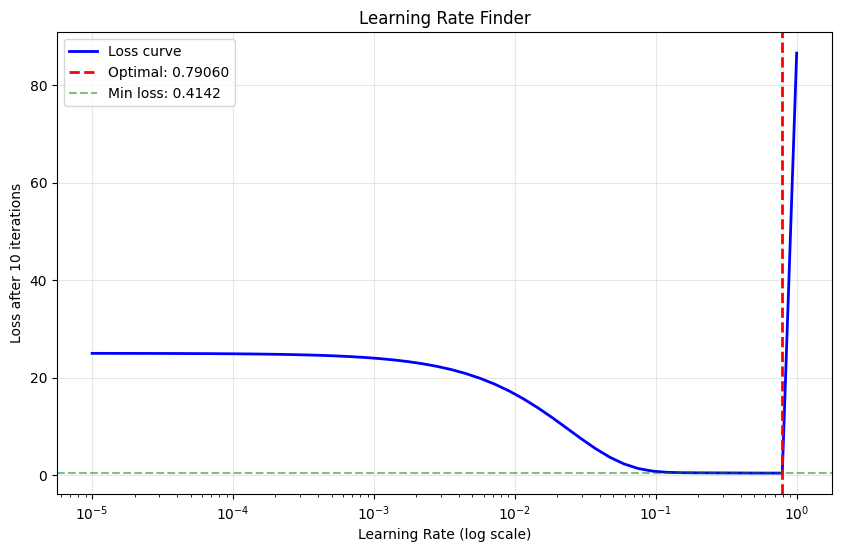

Suggested learning rate: 0.79060


In [28]:
def find_learning_rate(X, y, lr_range=(1e-5, 1), n_trials=50, n_iters=10):
    """find optimal learning rate via exponential search"""
    X_b = np.c_[np.ones((len(X), 1)), X]
    m = len(X)
    
    lrs = np.logspace(np.log10(lr_range[0]), np.log10(lr_range[1]), n_trials)
    losses = []
    
    for lr in lrs:
        theta = np.zeros((X_b.shape[1], 1))
        
        # train for a few iterations
        for _ in range(n_iters):
            grad = X_b.T @ (X_b @ theta - y) / m
            theta = theta - lr * grad
        
        # compute final loss
        predictions = X_b @ theta
        loss = np.sum((predictions - y)**2) / (2 * m)
        losses.append(min(loss, 1e10))  # cap to avoid plot issues
    
    return lrs, losses

# run the finder
lrs, losses = find_learning_rate(X, y)

# find the best
optimal_idx = np.argmin(losses)
optimal_lr = lrs[optimal_idx]

# plot
plt.figure(figsize=(10, 6))
plt.semilogx(lrs, losses, 'b-', linewidth=2, label='Loss curve')
plt.axvline(optimal_lr, color='r', linestyle='--', linewidth=2, 
            label=f'Optimal: {optimal_lr:.5f}')
plt.axhline(min(losses), color='g', linestyle='--', alpha=0.5,
            label=f'Min loss: {min(losses):.4f}')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Loss after 10 iterations')
plt.title('Learning Rate Finder')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f'Suggested learning rate: {optimal_lr:.5f}')

## 📊 PART 11: MULTI-FEATURE LINEAR REGRESSION

### 11.1 Beyond One Feature

So far we've been working with one input feature ($x$) predicting one output ($y$). But real-world problems have many features.

Let's build a house price predictor with:
- **Feature 1:** Land area (m²)
- **Feature 2:** Number of rooms
- **Feature 3:** Building age (years)

**The model becomes:**

$$h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3$$

Or in matrix form: $h(x) = \theta^T x$

### 11.2 The Math Stays the Same

Good news: Everything we've learned still applies!

**Gradient descent update (vectorized):**

$$\theta := \theta - \alpha \cdot \frac{1}{m} X^T (X\theta - y)$$

**Normal equation (if you want the closed-form):**

$$\theta = (X^TX)^{-1} X^T y$$

The beauty of linear algebra: it handles 1 feature or 1000 features with the same code.

### 11.3 Feature Scaling is Critical

With multiple features at different scales, **you must scale**. Otherwise gradient descent will struggle.

### 11.4 Interpreting the Coefficients

After training, you get one coefficient per feature. For example:
- **Intercept (50k):** Base price with no features
- **Land area (+25k):** Each additional m² adds 25k to the price
- **Rooms (+8k):** Each additional room adds 8k
- **Age (-150):** Each year older decreases price by 150

**Important:** These are relative to the scaled features. To get real-world interpretations, you'd need to account for the scaling factors.

### 11.5 Visualization Challenge

With 1 feature, we plot a line. With 2 features, we plot a plane. With 3+ features? We can't visualize it directly (humans only do 3D).

Instead, we plot:
- **Actual vs Predicted:** Scatter plot
- **Residuals:** Check if errors are random
- **Feature importance:** Which features matter most?

---

**Key takeaway:** Multi-feature regression is the same math, just more dimensions. Scale your features, use the same gradient descent, and interpret coefficients carefully. Linear algebra handles the heavy lifting.

Dataset: 100 houses, 3 features
X shape: (100, 3), y shape: (100, 1)

Results
True coefficients: [5, 50, -2]
Learned (scaled): [212.61  71.22 -14.2 ]
Final cost: 212.83

Note: Coefficients are for scaled features.



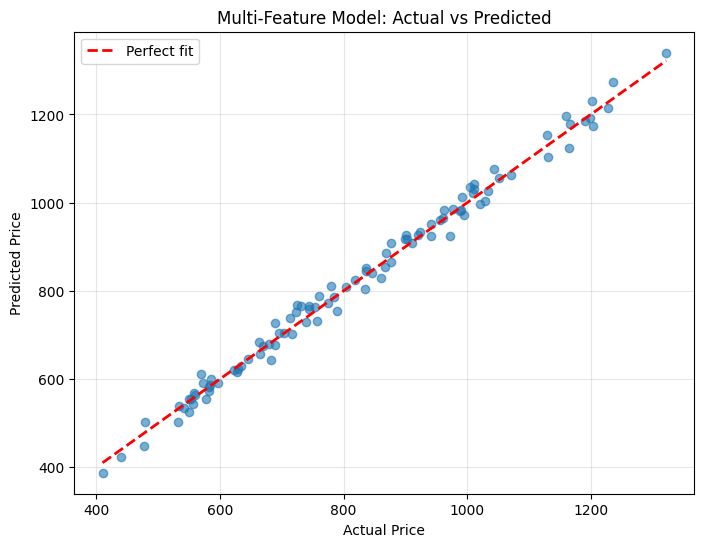

In [23]:
# multi-feature regression demo

np.random.seed(42)
m = 100

# generate 3 features: area, rooms, age
X_multi = np.column_stack([
    np.random.randint(50, 200, m),   # area: 50-200 m²
    np.random.randint(1, 6, m),       # rooms: 1-5
    np.random.randint(1, 30, m)       # age: 1-30 years
]).astype(float)

# true model: price = 100 + 5*area + 50*rooms - 2*age + noise
y_multi = (100 + 5*X_multi[:,0] + 50*X_multi[:,1] - 2*X_multi[:,2] + 
           np.random.randn(m)*20).reshape(-1, 1)

print(f'Dataset: {m} houses, 3 features')
print(f'X shape: {X_multi.shape}, y shape: {y_multi.shape}\n')

# scale features (critical for multi-feature!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)

# train
model = AdvancedGradientDescent(
    learning_rate=0.1,
    n_epochs=200,
    batch_size=16,
    momentum=0.9
)
model.fit(X_scaled, y_multi)

# results
print('Results')
print('='*50)
print(f'True coefficients: [5, 50, -2]')
print(f'Learned (scaled): {model.theta[1:].flatten().round(2)}')
print(f'Final cost: {model.cost_history[-1]:.2f}')
print('\nNote: Coefficients are for scaled features.\n')

# visualize: actual vs predicted
y_pred = model.predict(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_multi, y_pred, alpha=0.6)
plt.plot([y_multi.min(), y_multi.max()], 
         [y_multi.min(), y_multi.max()], 'r--', lw=2, label='Perfect fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multi-Feature Model: Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## ⚠️ PART 12: DEBUGGING GRADIENT DESCENT

### 12.1 When Things Go Wrong

Gradient descent fails silently. No error messages, just bad results. Here's how to diagnose and fix the most common issues.

### 12.2 Common Problems & Solutions

| Problem | Symptoms | Fix |
|---------|----------|-----|
| **LR too large** | Loss increases or explodes to NaN/Inf | Divide LR by 10 |
| **LR too small** | Loss decreases extremely slowly | Multiply LR by 10 |
| **Unscaled features** | Slow convergence, zigzag path | Use StandardScaler |
| **Exploding gradients** | Loss suddenly jumps to NaN | Gradient clipping or reduce LR |
| **Poor initialization** | Stuck immediately | Use small random init, not zeros |
| **Wrong gradient** | Loss doesn't decrease at all | Run gradient check |
| **Overfitting** | Train loss low, test loss high | Regularization or early stopping |

### 12.3 Debugging Workflow

**Step 1: Check your data**

Verify shapes, look for NaN/Inf, check feature scales are reasonable.

**Step 2: Monitor training**

Plot the loss curve. What you want to see:
- **Smooth decrease:** Good!
- **Spiky but trending down:** Normal for SGD, consider momentum
- **Flat line:** LR too small, or already converged
- **Increases:** LR too large, or gradient bug
- **NaN:** Numerical overflow, reduce LR immediately

**Step 3: Check gradient magnitude**

If gradient norm is huge (>1e6), you have numerical instability. If it's tiny (<1e-10), you've likely converged.

**Step 4: Verify predictions make sense**

Predictions should be in a similar range to actual values.

### 12.4 The "Sanity Check" Training Run

Before tuning hyperparameters, verify your implementation works on a tiny, easy problem. If a trivial dataset fails, your implementation has a bug. If it passes, your hyperparameters are the issue.

### 12.5 Quick Fixes

**Loss not decreasing:** Reduce learning rate by 10x

**Loss exploding:** Add gradient clipping or reduce LR

**Slow convergence:** Scale features + add momentum

---

**Key takeaway:** When gradient descent fails, it's usually one of: bad learning rate, unscaled features, or a gradient bug. Use this checklist systematically, and you'll find the issue fast.

Step 1: Data Validation
X: (100, 1), y: (100, 1)
Feature range: [0.01, 1.97]
✓ Data OK

Step 2: Training
✓ Training complete

Step 3: Loss Curve


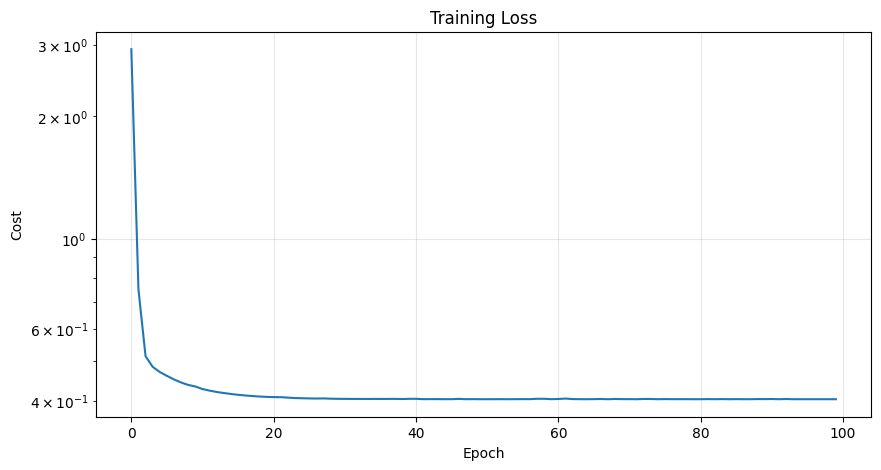


Step 4: Gradient Magnitude
Gradient norm: 0.005665
✓ Still optimizing

Step 5: Predictions
Predicted: [4.24, 9.68]
Actual:    [3.24, 11.04]

Sanity Check: y = 2x
Learned: [0.13314071 1.95471592]
Expected: [0, 2]
✓ Passed


In [27]:
# debugging gradient descent

# step 1: data validation
print('Step 1: Data Validation')
print('='*50)
print(f'X: {X.shape}, y: {y.shape}')
assert X.shape[0] == y.shape[0], "Mismatched samples!"
assert not np.isnan(X).any(), "NaN detected!"
assert not np.isinf(X).any(), "Inf detected!"
print(f'Feature range: [{X.min():.2f}, {X.max():.2f}]')
print('✓ Data OK\n')

# step 2: train a fresh model for this demo
print('Step 2: Training')
print('='*50)
model_debug = AdvancedGradientDescent(learning_rate=0.1, n_epochs=100, batch_size=20)
model_debug.fit(X, y)
print(f'✓ Training complete\n')

# step 3: loss curve
print('Step 3: Loss Curve')
plt.figure(figsize=(10, 5))
plt.plot(model_debug.cost_history)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Training Loss')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

# step 4: gradient magnitude at convergence
print('\nStep 4: Gradient Magnitude')
print('='*50)
X_b = np.c_[np.ones((len(X), 1)), X]
predictions = X_b @ model_debug.theta
errors = predictions - y
grad = X_b.T @ errors / len(y)
grad_norm = np.linalg.norm(grad)
print(f'Gradient norm: {grad_norm:.6f}')

if grad_norm > 1e6:
    print('⚠️ Too large - numerical instability')
elif grad_norm < 1e-6:
    print('✓ Very small - converged')
else:
    print('✓ Still optimizing')

# step 5: prediction range
print('\nStep 5: Predictions')
print('='*50)
y_pred = model_debug.predict(X)
print(f'Predicted: [{y_pred.min():.2f}, {y_pred.max():.2f}]')
print(f'Actual:    [{y.min():.2f}, {y.max():.2f}]')

# sanity check: y = 2x
print('\n' + '='*50)
print('Sanity Check: y = 2x')
print('='*50)
X_simple = np.array([[1], [2], [3], [4]])
y_simple = np.array([[2], [4], [6], [8]])

model_test = AdvancedGradientDescent(learning_rate=0.1, n_epochs=100)
model_test.fit(X_simple, y_simple)

print(f'Learned: {model_test.theta.flatten()}')
print(f'Expected: [0, 2]')
assert abs(model_test.theta[1] - 2.0) < 0.1, "Sanity check failed!"
print('✓ Passed')

## 🔗 PART 13: THE PATH TO DEEP LEARNING

### 13.1 You've Already Learned the Hard Part

Everything we've covered isn't just for linear regression – it's the **foundation of modern deep learning**.

Neural networks look fancy, but at their core? They're just doing what we've been doing: computing gradients and updating parameters.

### 13.2 The Direct Connections

| What We Learned | How It Appears in Deep Learning |
|-----------------|--------------------------------|
| **Gradient Descent** | Exact same algorithm – SGD, mini-batch GD |
| **Learning Rate** | Still the most important hyperparameter |
| **Batch Size** | 32, 64, 128 are standard in training neural nets |
| **Momentum** | Built into Adam, RMSprop, SGD with momentum |
| **Feature Scaling** | Becomes BatchNorm, LayerNorm in networks |
| **Gradient Check** | Handled automatically by autograd (PyTorch/TF) |
| **Early Stopping** | Implemented as callbacks in Keras/PyTorch |
| **Cost Function** | Becomes cross-entropy loss, but same idea |

### 13.3 What Changes in Deep Learning

**Linear regression:**
$$h(x) = \theta^T x$$

**Neural network:**
$$h(x) = W_3 \cdot \sigma(W_2 \cdot \sigma(W_1 \cdot x))$$

Same structure: parameters ($W$) and forward pass. The difference? Multiple layers with nonlinear activations ($\sigma$).

**Gradient descent stays identical:**
$$\theta := \theta - \alpha \cdot \nabla_\theta J$$

The only thing that changes is *how* you compute $\nabla_\theta J$ – that's where backpropagation comes in.

### 13.4 Skills That Transfer Directly

If you understand this module, you already know:

✅ How optimizers work (SGD, momentum, learning rate schedules)  
✅ Why batch size matters (speed vs stability tradeoff)  
✅ How to diagnose training issues (learning rate, convergence)  
✅ Why feature scaling is critical  
✅ The difference between train and test performance  

That's **50% of what you need** for deep learning. The rest is just:
- Backpropagation (chain rule, but automated)
- Network architectures (stacking layers)
- Regularization techniques (dropout, weight decay)

### 13.5 Next Steps

**To go deeper:**

1. **Implement backpropagation** – Build a 2-layer neural network from scratch
2. **Learn PyTorch/TensorFlow** – Same concepts, but autograd does the gradients
3. **Study architectures** – CNNs for images, Transformers for text
4. **Read papers** – Now you can understand the optimization sections

**Recommended path:**
- Andrej Karpathy's "Neural Networks: Zero to Hero" series
- CS231n (Stanford) for computer vision
- Fast.ai for practical deep learning

---

**Final thought:** Linear regression seems simple, but the optimization techniques you just learned power every neural network on the planet. Master these fundamentals, and deep learning becomes way less mysterious.

## 📝 SUMMARY: CHOOSING THE RIGHT METHOD

### When to Use What

| Method | Characteristics | Use When... |
|--------|----------------|-------------|
| **Batch GD** | Stable, deterministic, slow | Small dataset (fits in RAM), need exact convergence |
| **Stochastic GD** | Fast, noisy, memory-efficient | Massive datasets, online learning, limited memory |
| **Mini-Batch GD** | Balanced speed and stability | **Default choice** – industry standard for most problems |
| **Momentum** | Faster convergence, smooth path | Cost surface has valleys or sharp turns |
| **Normal Equation** | Closed-form, no iterations | Small dataset ($n < 1000$), features well-conditioned |
| **Pseudoinverse** | Robust to singularity | Same as above, but with redundant/correlated features |

### Decision Tree
```
Start
  │
  ├─ n > 10,000? 
  │    └─ YES → Use Gradient Descent (mini-batch)
  │    └─ NO → Normal Equation is an option
  │
  ├─ Features scaled?
  │    └─ NO → Scale them first!
  │    └─ YES → Good, proceed
  │
  ├─ Online learning needed?
  │    └─ YES → SGD (batch_size=1)
  │    └─ NO → Mini-batch GD (batch_size=32-256)
  │
  ├─ Slow convergence?
  │    └─ YES → Add momentum (0.9 typical)
  │    └─ NO → You're good
  │
  └─ Matrix singular?
       └─ YES → Use pinv() instead of inv()
       └─ NO → Either works
```

### Quick Reference

**For most practical problems:**
- Algorithm: **Mini-batch gradient descent**
- Batch size: **32-128**
- Learning rate: **0.01-0.1** (use LR finder)
- Momentum: **0.9**
- Scaling: **Always use StandardScaler**
- Epochs: **100-1000** (with early stopping)

**That's the recipe that works 90% of the time.**

---

**Key insight:** There's no single "best" method – it depends on your dataset size, feature count, and whether you need exact solutions or fast approximations. Start with mini-batch GD + momentum, and adjust from there.